# **Getting Started with ChemPlot**

<h>**Installation**
<p> Currenty to install ChemPlot, first install RDkit (a library for cheminiformatics). Then using pip you can install ChemPlot.

In [7]:
# # Install RDkit
# !pip install kora
# import kora.install.rdkit

# # Install chemplot
# !pip install chemplot

<h>**Import the library and the Example Datasets**
<p>Let's start by importing ChemPlot and two example datasets to demonstrate its the functionalities. We the following datasets: BBBP (blood-brain barrier penetration) [1] and SAMPL (Hydration free energy)  [2] dataset. The target of the BBBP dataset is discrete while the target for the SAMPL dataset is continuos.

---
<p>[1] Martins, Ines Filipa, et al. (2012). A Bayesian approach to in silico blood-brain barrier penetration modeling. Journal of chemical information and modeling 52.6, 1686-1697
<p>[2] Mobley, David L., and J. Peter Guthrie. "FreeSolv: a database of experimental and calculated hydration free energies, with input files." Journal of computer-aided molecular design 28.7 (2014): 711-720.

In [8]:
from chemplot import load_data, Plotter

data_BBBP = load_data("BBBP")
data_SAMPL = load_data("SAMPL")

Let's explore the BBBP dataset.

In [9]:
data_BBBP 

smiles  target
0                      [Cl].CC(C)NCC(O)COc1cccc2ccccc12       1
1              C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl       1
2     c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...       1
3                      C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C       1
4     Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...       1
...                                                 ...     ...
2034    C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl       1
2035  [C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...       1
2036  [O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...       1
2037  C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...       1
2038  [N+](=NCC(=O)N[C@@H]([C@H](O)C1=CC=C([N+]([O-]...       1

[2039 rows x 2 columns]

Let's explore the SAMPL dataset.

In [10]:
data_SAMPL

smiles  target
0    CN(C)C(=O)c1ccc(cc1)OC  -11.01
1              CS(=O)(=O)Cl   -4.87
2                  CC(C)C=C    1.83
3                CCc1cnccn1   -5.45
4                  CCCCCCCO   -4.21
..                      ...     ...
637          CCCCCCCC(=O)OC   -2.04
638                 C1CCNC1   -5.48
639          c1cc(ccc1C=O)O   -8.83
640               CCCCCCCCl    0.29
641                C1COCCO1   -5.06

[642 rows x 2 columns]

<h>**Plotting the Datasets**
<p>We can now use the library to create some plots. Let's compare the scatter plot for BBBP with the plots describing the distribuition of the chemical space.

Create a Plotter object

In [11]:
cp_BBBP = Plotter.from_smiles(data_BBBP["smiles"], target=data_BBBP["target"], target_type="C")

sim_type indicates the similarity type by which the plots are constructed.
The supported similarity types are structural and tailored.
Because a target list has been provided 'tailored' as been selected as sym_type.


[07:22:15] WARNING: not removing hydrogen atom without neighbors
[07:22:15] WARNING: not removing hydrogen atom without neighbors
[07:22:15] WARNING: not removing hydrogen atom without neighbors
[07:22:15] WARNING: not removing hydrogen atom without neighbors
[07:22:15] WARNING: not removing hydrogen atom without neighbors
[07:22:15] WARNING: not removing hydrogen atom without neighbors
[07:22:15] WARNING: not removing hydrogen atom without neighbors
[07:22:15] WARNING: not removing hydrogen atom without neighbors
[07:22:16] WARNING: not removing hydrogen atom without neighbors
[07:22:16] WARNING: not removing hydrogen atom without neighbors
[07:22:16] WARNING: not removing hydrogen atom without neighbors
[07:22:16] WARNING: not removing hydrogen atom without neighbors
[07:22:17] WARNING: not removing hydrogen atom without neighbors
[07:22:17] WARNING: not removing hydrogen atom without neighbors
[07:22:17] WARNING: not removing hydrogen atom without neighbors
[07:22:17] WARNING: not r

For the following SMILES not all descriptors can be computed:
[N+](=[N-])=O.
These SMILES will be removed from the data.


Reduce the dimensions of the molecular descriptors

In [12]:
cp_BBBP.tsne(random_state=0)

t-SNE-1    t-SNE-2  target
0     39.888184 -10.739444       1
1     29.790758 -32.687946       1
2      7.649108  22.147152       1
3     26.488811 -32.844616       1
4    -65.006363  26.873699       1
...         ...        ...     ...
2033  16.833427  68.763786       1
2034 -42.523079  45.480843       1
2035 -10.789108   7.472157       1
2036  16.624157  72.895309       1
2037  11.985138 -36.586933       1

[2038 rows x 3 columns]

Compare "scatter", "hex" and "kde" plots

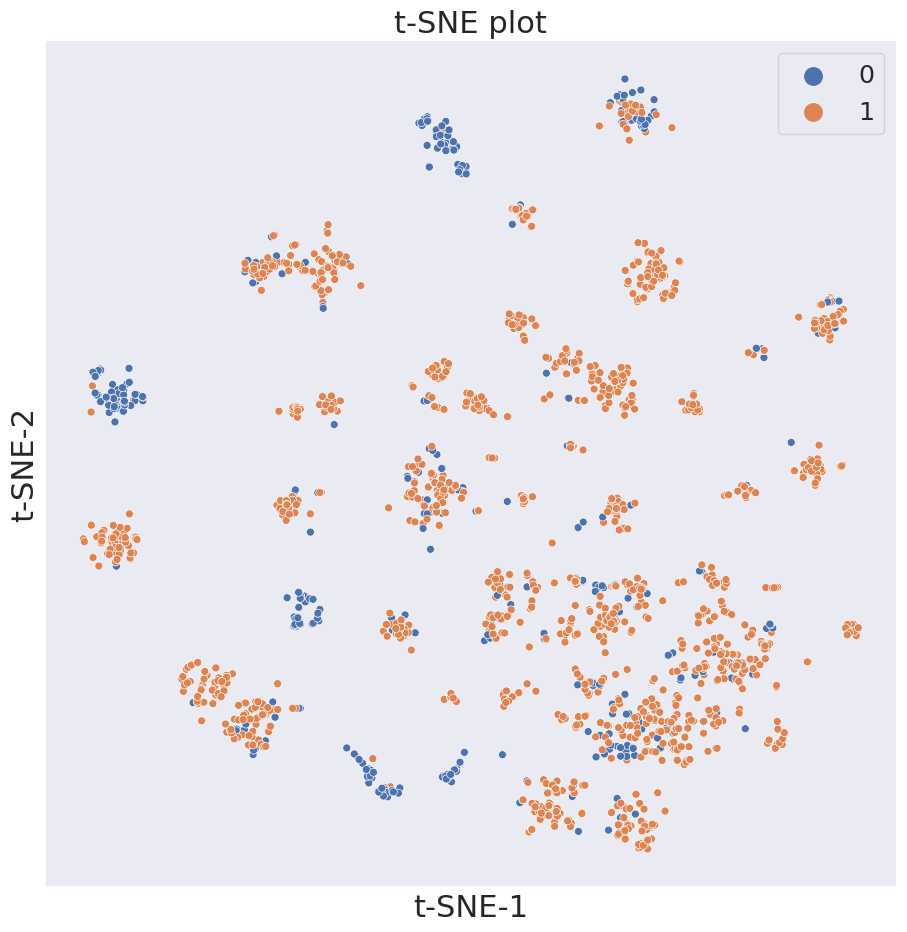

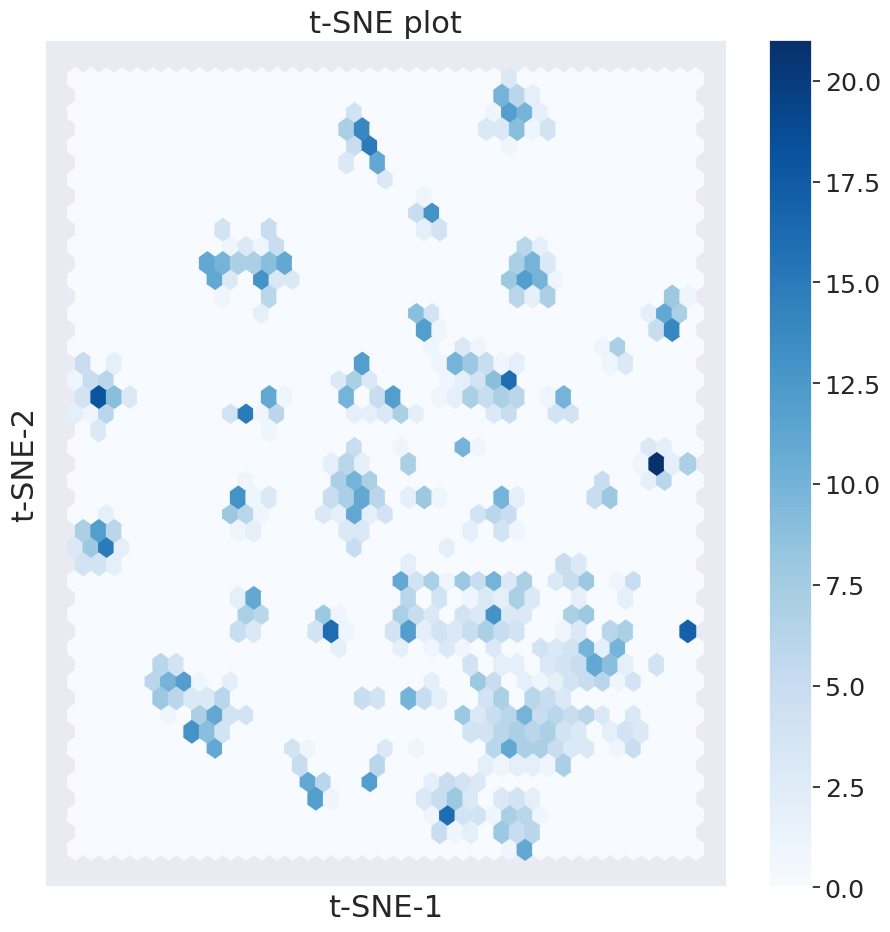

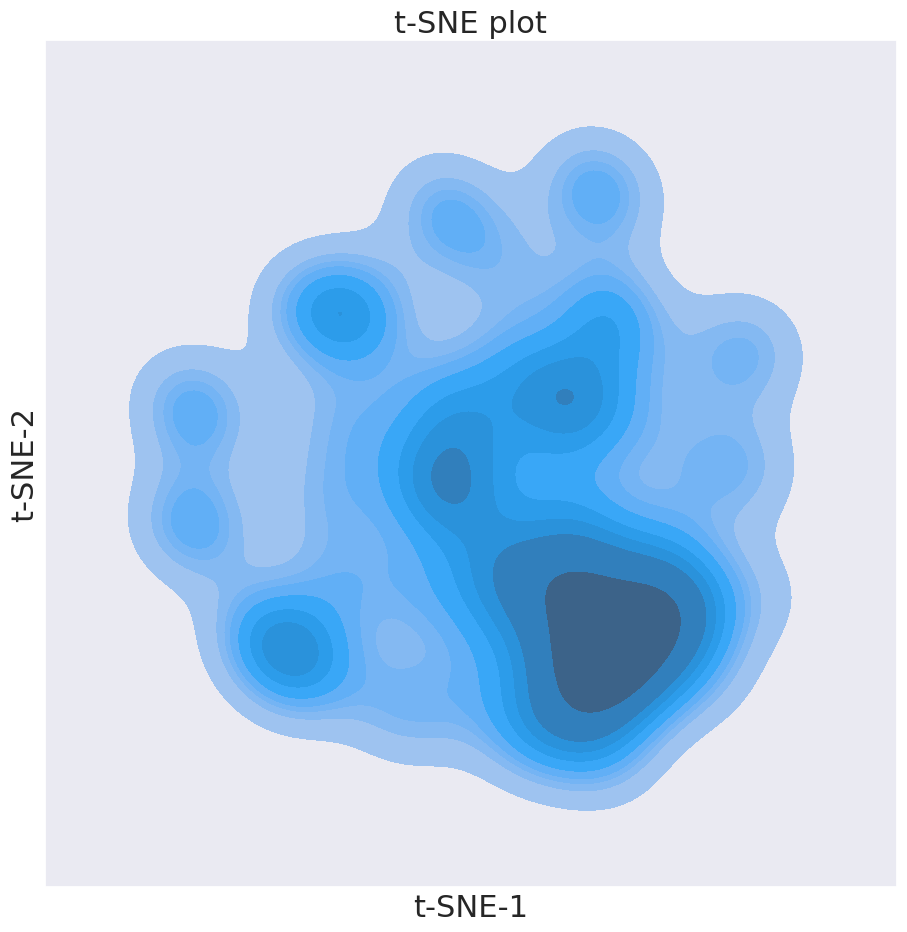

In [13]:
cp_BBBP.visualize_plot(kind="scatter", size=11)
cp_BBBP.visualize_plot(kind="hex", size=11)
cp_BBBP.visualize_plot(kind="kde", size=11);

Let's now do the same for a dataset with a continuos target like SAMPL. Create a Plotter object

In [14]:
cp_SAMPL = Plotter.from_smiles(data_SAMPL["smiles"], target=data_SAMPL["target"], target_type="R")

sim_type indicates the similarity type by which the plots are constructed.
The supported similarity types are structural and tailored.
Because a target list has been provided 'tailored' as been selected as sym_type.
For the following SMILES not all descriptors can be computed:
NN
N
S.
These SMILES will be removed from the data.


Reduce the dimensions of the molecular descriptors

In [15]:
cp_SAMPL.tsne(random_state=0);

Scatter Plot for SAMPL dataset.

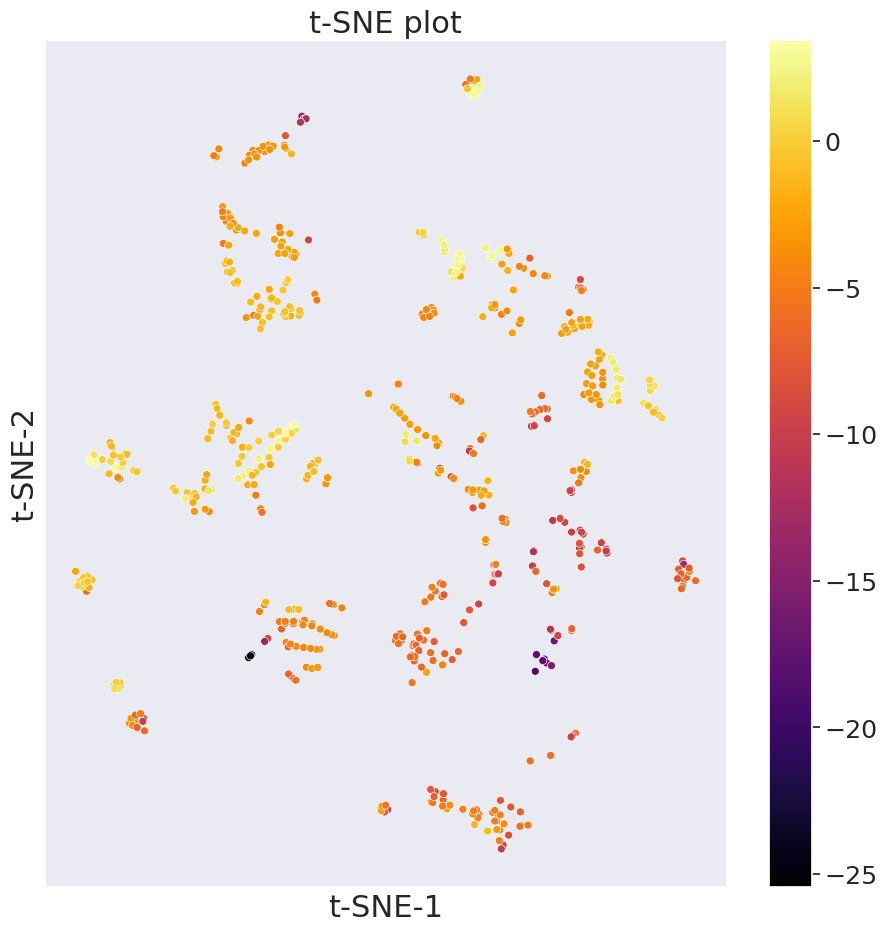

In [16]:
cp_SAMPL.visualize_plot(size=11, colorbar=True);

<h>**Comparing the dimensionality reduction methods**
<p>We will try know to see how different are the plots generated by PCA, t-SNE and UMAP.

Inspect BBBP and compare "PCA", "t-SNE" and "UMAP" plots.

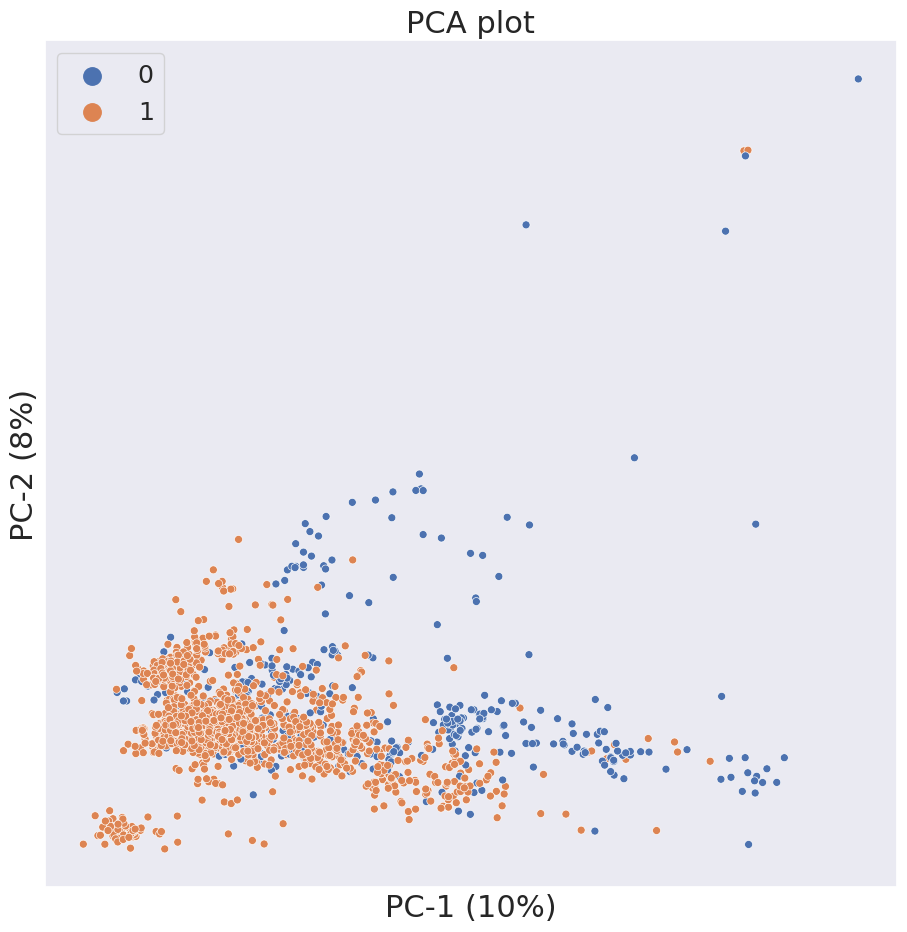

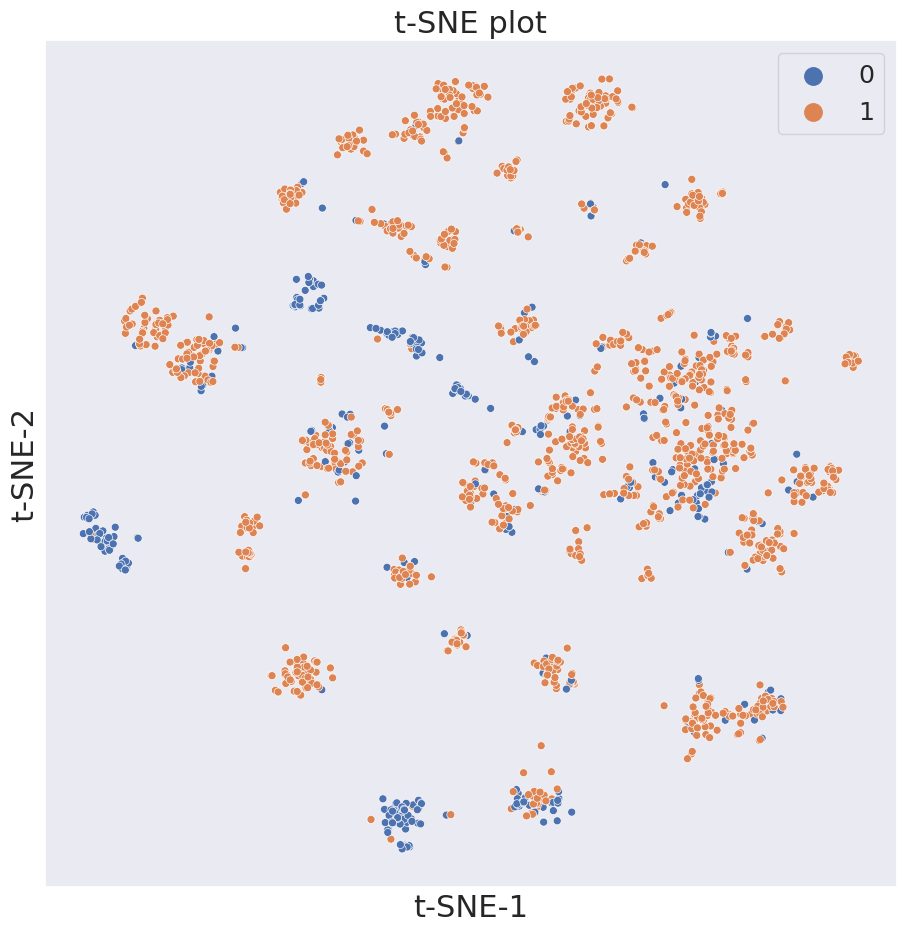

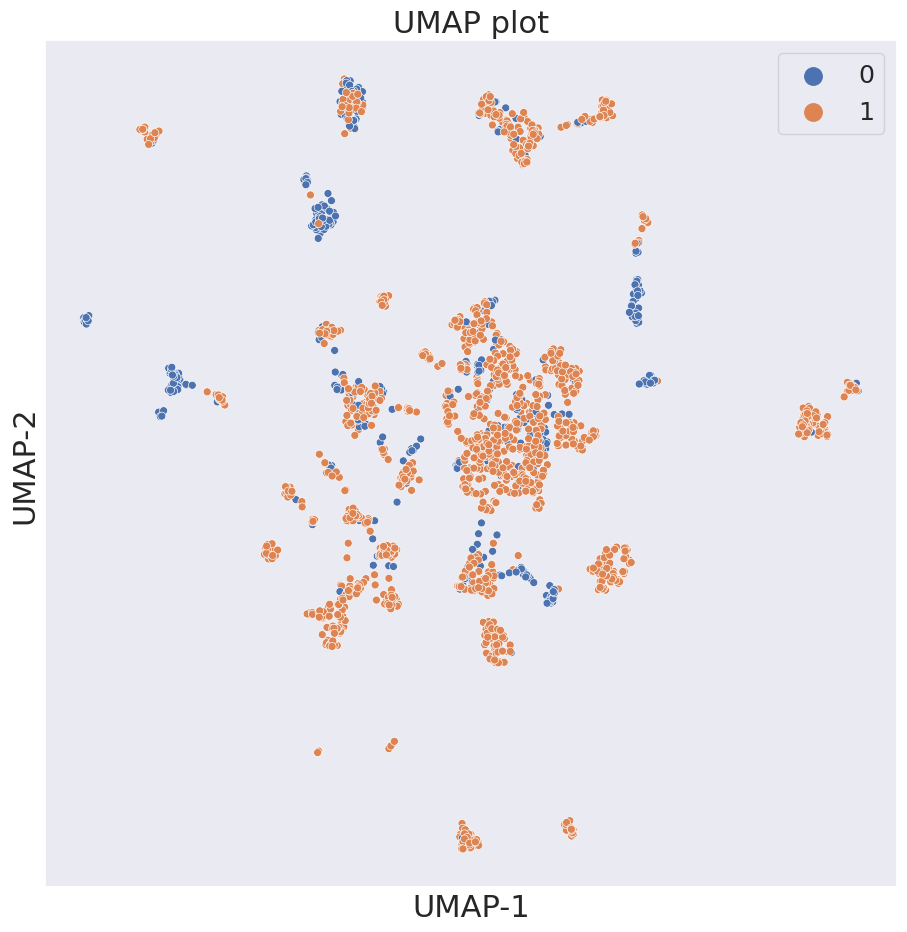

In [17]:
cp_BBBP.pca()
cp_BBBP.visualize_plot(size=11);
cp_BBBP.tsne()
cp_BBBP.visualize_plot(size=11);
cp_BBBP.umap()
cp_BBBP.visualize_plot(size=11);

**t-SNE perplexity value**
<p>Change the perplexity to obtain plots with smaller or bigger clusters. The adequate value for perplexity is however already chosen automatically by ChemPlot.
<p>To see that first let's plot the BBBP data with t-SNE using different values for perplexity.

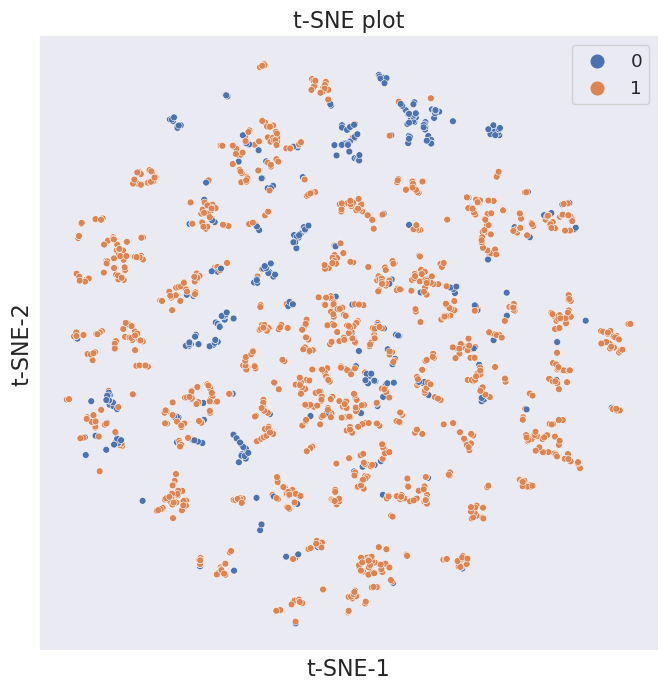

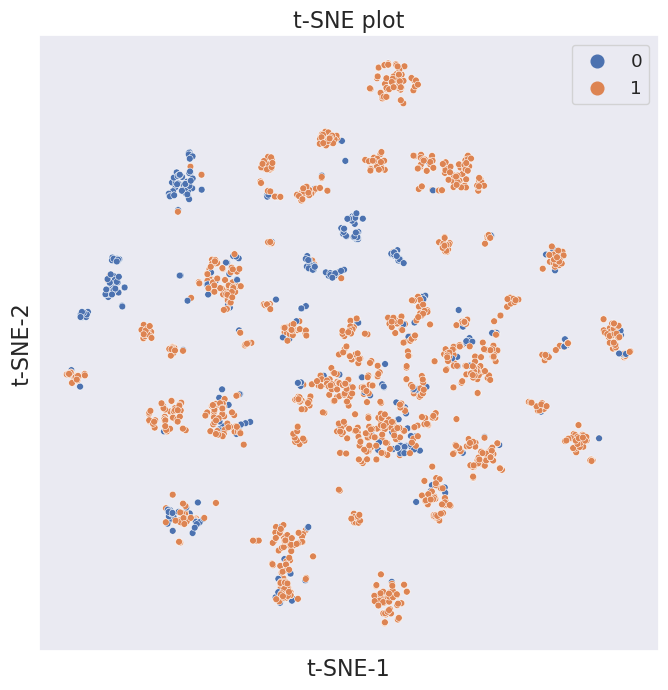

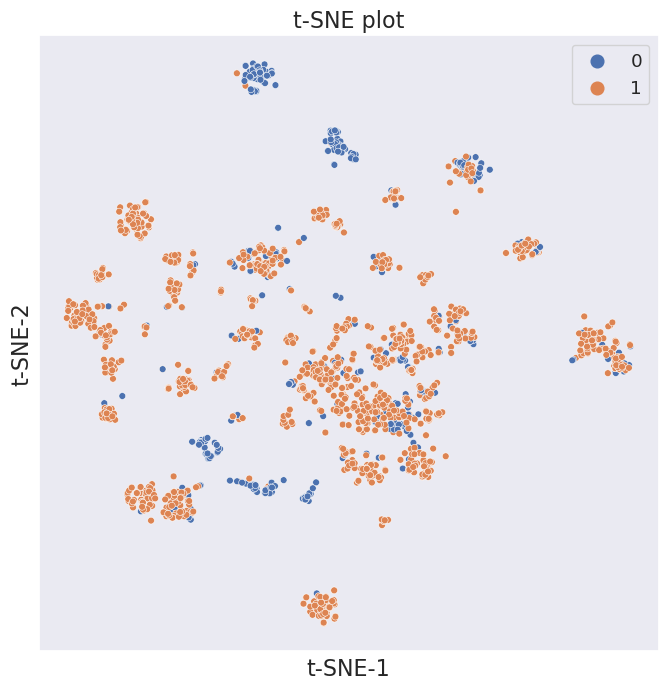

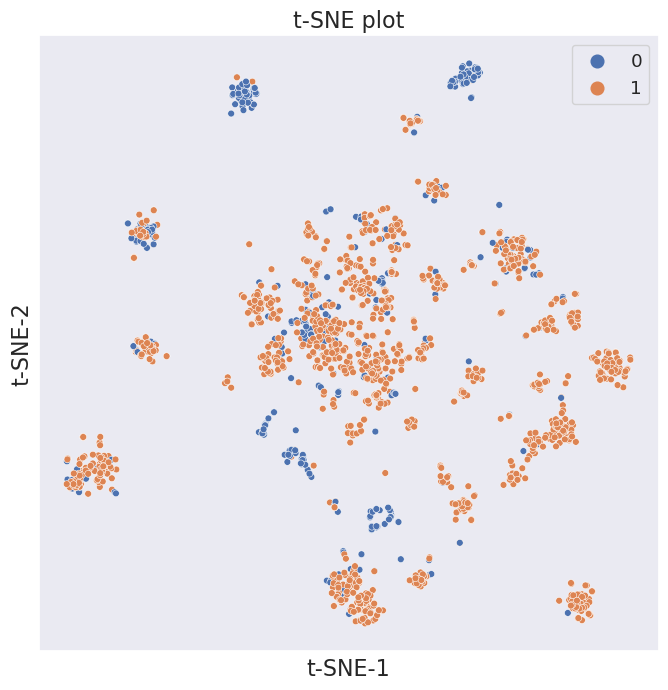

In [18]:
#Perplexity produces robust results with values between 5 and 50 
cp_BBBP.tsne(perplexity=5, random_state=0)
cp_BBBP.visualize_plot(size=8);
cp_BBBP.tsne(perplexity=15, random_state=0)
cp_BBBP.visualize_plot(size=8);
cp_BBBP.tsne(perplexity=30, random_state=0)
cp_BBBP.visualize_plot(size=8);
cp_BBBP.tsne(perplexity=50, random_state=0)
cp_BBBP.visualize_plot(size=8);

<p>Let's know plot the BBBP dataset leaving to ChemPlot the choice for the perplexity value.

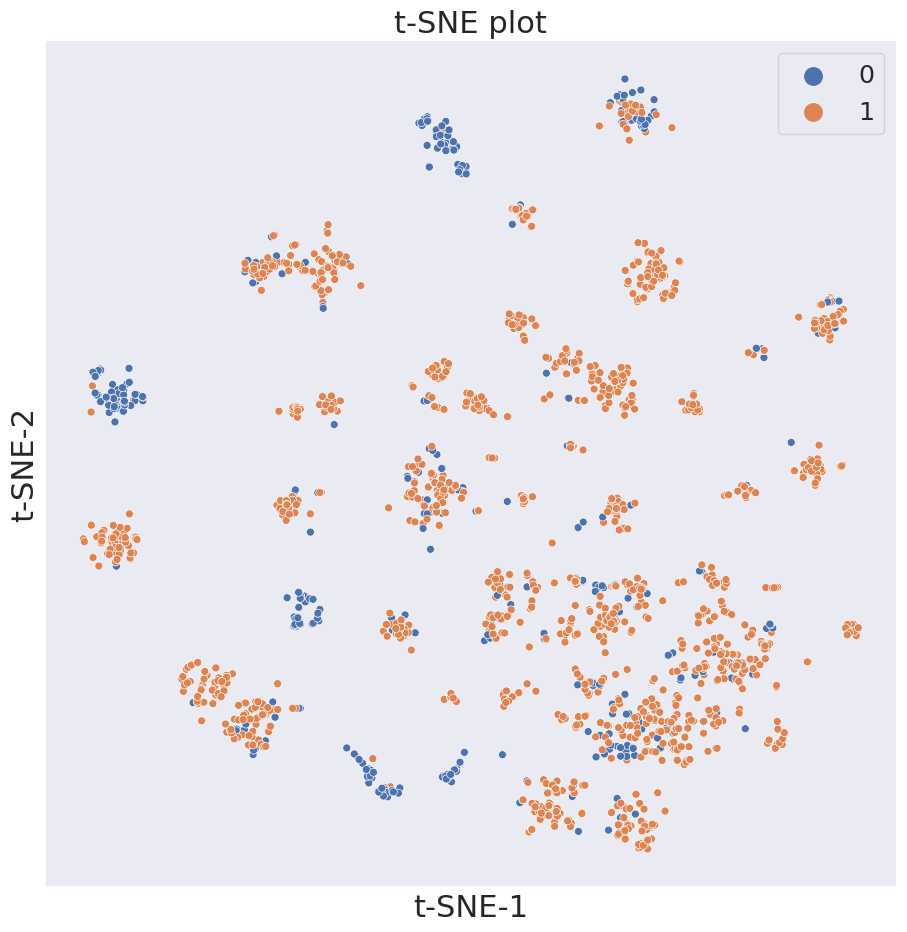

In [19]:
cp_BBBP.tsne(random_state=0)
cp_BBBP.visualize_plot(size=11);

<h>**UMAP n_neighbors value**
<p>Similarly UMAP takes a n_neighbors to decide which molecules need to be cliustered together. However also here ChemPlot automatically selects a suitable number given the size of your dataset. 

<h>**Structural Similarity**
<p>What if you do not have a target proprety? You can still use ChemPlot by creating a structural similarity based Plotter object.
<p>To demonstrate this we can now create a plot with the BBBP dataset using structural similarity. 

In [20]:
cp_BBBP_structural = Plotter.from_smiles(data_BBBP["smiles"], target=data_BBBP["target"], target_type="C", sim_type="structural")

[07:24:35] WARNING: not removing hydrogen atom without neighbors
[07:24:35] WARNING: not removing hydrogen atom without neighbors
[07:24:35] WARNING: not removing hydrogen atom without neighbors
[07:24:35] WARNING: not removing hydrogen atom without neighbors
[07:24:35] WARNING: not removing hydrogen atom without neighbors
[07:24:35] WARNING: not removing hydrogen atom without neighbors
[07:24:35] WARNING: not removing hydrogen atom without neighbors
[07:24:35] WARNING: not removing hydrogen atom without neighbors
[07:24:35] WARNING: not removing hydrogen atom without neighbors
[07:24:36] WARNING: not removing hydrogen atom without neighbors
[07:24:36] WARNING: not removing hydrogen atom without neighbors
[07:24:36] WARNING: not removing hydrogen atom without neighbors
[07:24:36] WARNING: not removing hydrogen atom without neighbors
[07:24:36] WARNING: not removing hydrogen atom without neighbors
[07:24:36] WARNING: not removing hydrogen atom without neighbors
[07:24:36] WARNING: not r

Reduce the dimensions of the molecular descriptors

In [21]:
cp_BBBP_structural.tsne()

t-SNE-1    t-SNE-2  target
0     -0.073308  35.802181       1
1      7.661233  22.197844       1
2     39.714756  -9.697554       1
3    -47.755718  22.136526       1
4     79.259705  -2.635864       1
...         ...        ...     ...
2034  -2.036940  -4.522566       1
2035  31.874117  21.724401       1
2036 -16.026834  15.521593       1
2037  -7.954837   0.366023       1
2038  17.437750  24.780424       1

[2039 rows x 3 columns]

<p> Let's plot the BBBP dataset with t-SNE.

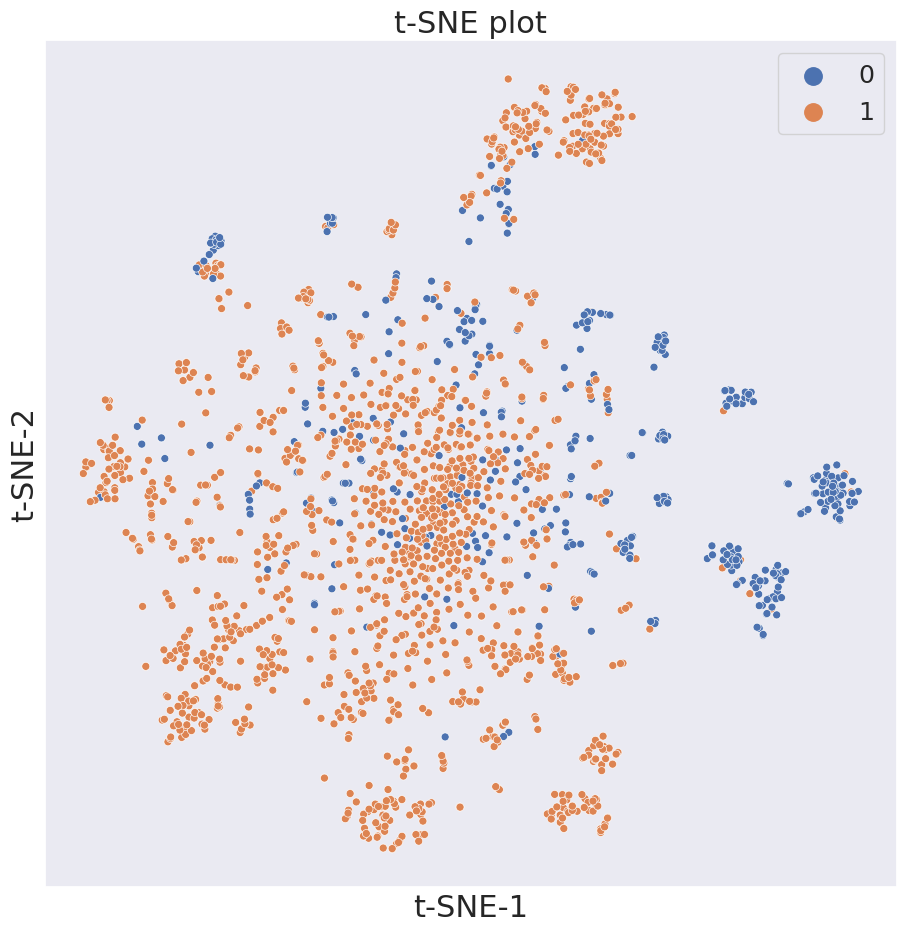

In [22]:
cp_BBBP_structural.visualize_plot(size=11);

<h>**Interactive Plots**
<p>We can create interactive plots using ChemPlot. Let's first import make sure the plots will be displayed within the notebook.

In [25]:
from bokeh.io import output_notebook
# Call once to configure Bokeh to display plots inline in the notebook.
output_notebook()

Loading BokehJS ...

We can now use *interactive_plot()* rather than *visualize_plot()* to generate an interactive plot for SAMPL. Use the tools in the right to explore the plot. You can select a group of molecules, zoom or visualize the molecular structure in 2D.

In [27]:
cp_SAMPL.tsne(random_state=0)
cp_SAMPL.interactive_plot(show_plot=True)

Figure(id='1231', ...)